In [18]:
# in this notebook, we are testing out some new math to make the model a bit more self-consistent and logical
# and making sure it still runs to steady state in a reasonable time when those changes are made
# see notes from 3/8/23 in red, gridded notebook for details on changes
# and/or compare to "default.ipynb"

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# create a profile
dx = 500
x = np.arange(0, 50000, dx)
x_node = x + (dx/2)

# add some elevation
Hstar = 0.5 # depth decay
etab = np.zeros(len(x)) # bedrock elevation
etab[:] = np.linspace(1, 0.1, len(x)) # need to start with slight bedrock slope
H = Hstar + np.zeros(len(x)) # alluvium thickness
eta = etab + H # topography

In [21]:
# define constants and other parameters
K = 1e-6 # erodibility
beta = 0.0005 # abradability
zeta = 0.001 # abradability
r = 5. # runoff rate
U = 0.0001 # uplift or baselevel fall rate
I = 0.01 # intermittency
phi = 0.1 # porosity
D = 0.01 # grain size
gamma = 0.5 # fraction plucked that becomes coarse

kqs = 0.041 # sed transport coeff
kxb = 25 # valley width coeff
Pxb = 1./5. # valley width exp
kb = 8.3e-8 # channel width coeff

B_valley = kxb * (x_node**Pxb) # valley width
# Q = (r * kxb * x_node**(1 + Pxb))/(1 + Pxb) # discharge
A = (1./3.) * (x**2)
Q = r * A

In [22]:
def model(x, dx, x_node,
          K, beta, zeta, gamma,
          D, phi, Hstar,
          kb, kqs, I, r, U,
          etab, H, eta,
          B_valley, Q,
          num_steps = 1):
    
    q = Q/B_valley
    dt = 15
    
    run_duration = dt * num_steps
    cum_time = 0.0
    
    Qs = np.zeros(len(x))
    qs = np.zeros(len(x))
    Eb_p = np.zeros(len(x))
    Eb_a = np.zeros(len(x))
    Eb = np.zeros(len(x))
    Eh = np.zeros(len(x))
    E = np.zeros(len(x))
    ql = np.zeros(len(x)) # lateral sediment supply
    
    H[-1] = 0
    E[-1] = U
    q[0] = 0
    Qs[0] = 0
    
    while cum_time < run_duration:
        
        # drop baselevel
        eta[-1] -= U * dt
        
        # set boundary conditions
        etab[-1] = eta[-1]
        
        # calc slope
        S = -np.diff(eta)/dx
        
        # calc bed exposure
        alpha = np.exp(-H/Hstar)
        
        # calc sed transport
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.) * (1 - alpha[:-1])
        qs[1:] = Qs[1:] / B_valley[1:]
        
        # calc bedrock erosion
        Eb_p[:-1] = K * Q[1:] * S**(7./6.) * alpha[:-1] * I
        Eb_a[:-1] = beta * Qs[1:] * alpha[:-1]
        Eb[:-1] = (Eb_p[:-1] + Eb_a[:-1]) / B_valley[:-1]
        
        # calc lateral flux
        ql[:-1] = ((Eb[:-1] * gamma)/zeta) * (1 - np.exp(-zeta * x[1:]/3))
        
        # calc grain attrition
        atr = Qs * zeta
        
        # calc sediment erosion rate
        Eh[:-1] = 1/((1 - phi) * B_valley[:-1]) * (np.diff(Qs)/dx + atr[1:] - (Eb_p[:-1]*gamma) - ql[:-1])
        
        # calc total erosion rate
        E[:-1] = Eb[:-1] + Eh[:-1]
        
        # update topography
        etab[:-1] -= Eb[:-1] * dt
        H[:-1] -= Eh[:-1] * dt
        H[H<0] = 0
        eta[:-1] = etab[:-1] + H[:-1]
        
        # update elapsed time
        cum_time += dt
        
    print(cum_time)
        
    return (dt, S, q, alpha, Qs, qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta)

In [23]:
#now write a test
num_steps = 10000000

test_run = [x, dx, x_node, 
            K, beta, zeta, gamma,
            D, phi, Hstar,
            kb, kqs, I, r, U,
            etab, H, eta,
            B_valley, Q,
            num_steps]

# and run it
(dt, S, q, alpha, Qs, qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta) = model(*test_run)

150000000.0


In [24]:
Eb

array([1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 0.e+00])

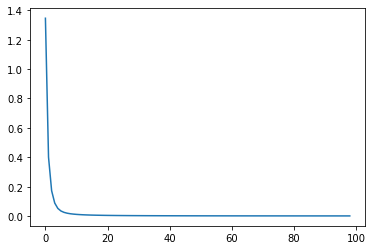

In [25]:
plt.plot(S)

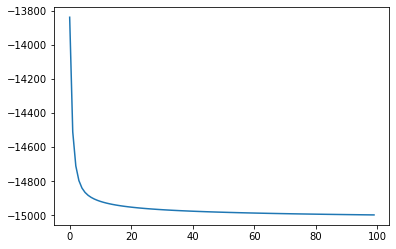

In [26]:
plt.plot(eta)

In [27]:
S[-1]

0.00040143980205175467

In [28]:
eta

array([-13838.79986955, -14511.63331023, -14711.81770456, -14797.68911254,
       -14841.61890843, -14867.34942254, -14884.31711925, -14896.58543337,
       -14906.04972913, -14913.68470306, -14920.04133374, -14925.45717102,
       -14930.15292193, -14934.28059895, -14937.94934907, -14941.24021494,
       -14944.21503884, -14946.92208654, -14949.39974221, -14951.67901941,
       -14953.78531803, -14955.73968514, -14957.55973989, -14959.26036518,
       -14960.85423374, -14962.35221416, -14963.76368859, -14965.0968041 ,
       -14966.35867381, -14967.55553919, -14968.69290237, -14969.77563458,
       -14970.80806589, -14971.79405989, -14972.73707607, -14973.6402225 ,
       -14974.50630025, -14975.33784127, -14976.13714067, -14976.90628442,
       -14977.64717324, -14978.36154323, -14979.05098375, -14979.71695301,
       -14980.36079169, -14980.98373487, -14981.58692252, -14982.1714087 ,
       -14982.73816978, -14983.28811164, -14983.82207612, -14984.34084675,
       -14984.84515382, -

In [29]:
eta_adj = eta - eta[-1]

In [30]:
eta_adj

array([1.16060013e+03, 4.87766692e+02, 2.87582298e+02, 2.01710890e+02,
       1.57781094e+02, 1.32050580e+02, 1.15082883e+02, 1.02814569e+02,
       9.33502729e+01, 8.57152990e+01, 7.93586683e+01, 7.39428310e+01,
       6.92470801e+01, 6.51194031e+01, 6.14506530e+01, 5.81597871e+01,
       5.51849632e+01, 5.24779155e+01, 5.00002598e+01, 4.77209827e+01,
       4.56146840e+01, 4.36603169e+01, 4.18402622e+01, 4.01396369e+01,
       3.85457683e+01, 3.70477879e+01, 3.56363135e+01, 3.43031980e+01,
       3.30413283e+01, 3.18444629e+01, 3.07070997e+01, 2.96243675e+01,
       2.85919362e+01, 2.76059422e+01, 2.66629260e+01, 2.57597796e+01,
       2.48937018e+01, 2.40621608e+01, 2.32628614e+01, 2.24937176e+01,
       2.17528288e+01, 2.10384588e+01, 2.03490183e+01, 1.96830491e+01,
       1.90392104e+01, 1.84162672e+01, 1.78130795e+01, 1.72285934e+01,
       1.66618323e+01, 1.61118904e+01, 1.55779259e+01, 1.50591553e+01,
       1.45548482e+01, 1.40643230e+01, 1.35869426e+01, 1.31221105e+01,
      

In [31]:
ql

array([0.00767591, 0.01417343, 0.01967347, 0.02432914, 0.02827009,
       0.03160603, 0.03442984, 0.03682014, 0.03884349, 0.04055622,
       0.04200601, 0.04323324, 0.04427206, 0.0451514 , 0.04589575,
       0.04652583, 0.04705918, 0.04751065, 0.04789281, 0.0482163 ,
       0.04849013, 0.04872192, 0.04891813, 0.04908422, 0.04922481,
       0.04934381, 0.04944455, 0.04952982, 0.049602  , 0.0496631 ,
       0.04971482, 0.0497586 , 0.04979566, 0.04982703, 0.04985359,
       0.04987606, 0.04989509, 0.04991119, 0.04992483, 0.04993637,
       0.04994614, 0.04995441, 0.04996141, 0.04996733, 0.04997235,
       0.04997659, 0.04998018, 0.04998323, 0.0499858 , 0.04998798,
       0.04998983, 0.04999139, 0.04999271, 0.04999383, 0.04999478,
       0.04999558, 0.04999626, 0.04999683, 0.04999732, 0.04999773,
       0.04999808, 0.04999837, 0.04999862, 0.04999883, 0.04999901,
       0.04999916, 0.04999929, 0.0499994 , 0.04999949, 0.04999957,
       0.04999964, 0.04999969, 0.04999974, 0.04999978, 0.04999

In [32]:
Eb

array([1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 0.e+00])

In [33]:
ql/B_valley

array([0.00010177, 0.00015084, 0.00018904, 0.00021856, 0.00024152,
       0.0002594 , 0.00027329, 0.00028401, 0.00029221, 0.00029839,
       0.00030293, 0.00030616, 0.00030833, 0.00030965, 0.00031029,
       0.00031038, 0.00031004, 0.00030935, 0.00030839, 0.00030722,
       0.00030589, 0.00030444, 0.0003029 , 0.0003013 , 0.00029965,
       0.00029798, 0.0002963 , 0.00029462, 0.00029295, 0.0002913 ,
       0.00028966, 0.00028805, 0.00028647, 0.00028492, 0.0002834 ,
       0.00028191, 0.00028046, 0.00027903, 0.00027765, 0.00027629,
       0.00027496, 0.00027367, 0.00027241, 0.00027118, 0.00026998,
       0.0002688 , 0.00026765, 0.00026653, 0.00026544, 0.00026437,
       0.00026332, 0.0002623 , 0.0002613 , 0.00026032, 0.00025936,
       0.00025843, 0.00025751, 0.00025661, 0.00025573, 0.00025487,
       0.00025402, 0.00025319, 0.00025238, 0.00025158, 0.00025079,
       0.00025002, 0.00024927, 0.00024852, 0.0002478 , 0.00024708,
       0.00024637, 0.00024568, 0.000245  , 0.00024433, 0.00024

In [34]:
# save csv files

np.savetxt('elevation csv files/eta_soft_sed.csv', eta_adj, delimiter = ',')
np.savetxt('alpha csv files/alpha_soft_sed.csv', alpha, delimiter = ',')
np.savetxt('slope csv files/slope_soft_sed.csv', S, delimiter = ',')